<a href="https://colab.research.google.com/github/Passavee-Losripat/Brain-Tumour-Detection/blob/main/brain_tumour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Kaggle Library for retrieving data
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
#Download Dataset
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
! mkdir data
! unzip /content/brain-mri-images-for-brain-tumor-detection.zip -d /content/data

mkdir: cannot create directory ‘data’: File exists
Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: /content/data/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/data/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/19 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/2 no.jpeg  
  inflating: /content/data/brain_tumor_dataset/no/20 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/21 no.jpg  
  inflating: /content/data/brain_tumor_dataset/no/22 no.jpg  
  inflating: /c

In [4]:
#Import all library
import matplotlib.pyplot as plt #Graph illustrating
from tensorflow.keras.utils import to_categorical #one-hot categorical
from tensorflow.keras.models import Sequential #Model Implement
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten #Model Implement
from tensorflow.keras.callbacks import EarlyStopping #Time Usage Reducing
from tensorflow.keras.preprocessing.image import ImageDataGenerator#Data Processing
from sklearn.metrics import classification_report, confusion_matrix #Model Evaluation
import pandas as pd #Data Processing
import numpy as np #Data Processing
import cv2

In [5]:
#Load Data
datagen = ImageDataGenerator()
train = datagen.flow_from_directory('/content/data/brain_tumor_dataset', class_mode='categorical')
valid = train
test = train

Found 253 images belonging to 2 classes.


In [6]:
#Implement Model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(256,256,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(265, activation='relu'))

model.add(Dense(265, activation='relu'))

model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 253, 253, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 508032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 265)                 │     134,628,745 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 265)                 │          70,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             532 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,701,335 (513.84 MB)

 Trainable params: 134,701,335 (513.84 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#Model Training
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.fit(train, epochs=30, validation_data=valid, callbacks=[early_stop])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 864ms/step - accuracy: 0.5106 - loss: 6901.0967 - val_accuracy: 0.5375 - val_loss: 366.6104
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.5924 - loss: 516.4891 - val_accuracy: 0.7233 - val_loss: 181.1254
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.6974 - loss: 277.2748 - val_accuracy: 0.6640 - val_loss: 161.1975
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.7204 - loss: 130.9920 - val_accuracy: 0.5494 - val_loss: 166.3615
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.7110 - loss: 92.9427 - val_accuracy: 0.9328 - val_loss: 12.6303
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.8882 - loss: 13.3173 - val_accuracy: 0.9526 - val_loss: 5.0561
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9579 - loss: 7.6485 - val_accuracy: 0.9763 - val_loss: 2.8570
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9540 - loss: 2.5829 - val_accuracy: 0.9881 -

<Axes: >

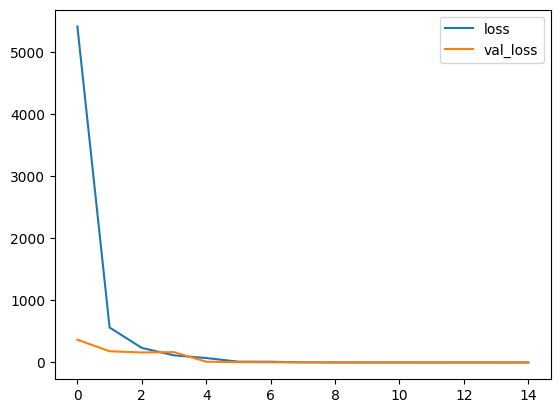

In [10]:
#Model evaluation
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

<Axes: >

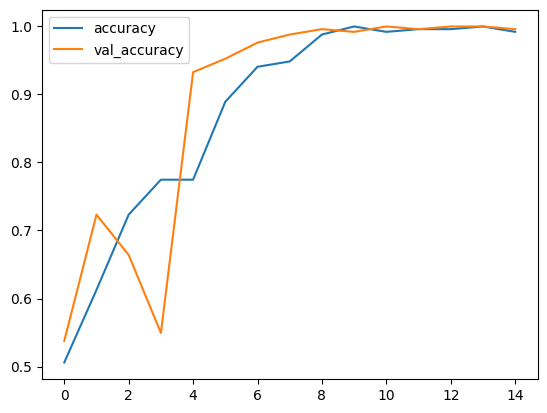

In [11]:
metrics[['accuracy', 'val_accuracy']].plot()

In [12]:
loss, acc = model.evaluate(test)
print("Loss: ", loss)
print("Acc: ", acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9953 - loss: 0.1632
Loss:  0.13804584741592407
Acc:  0.9960474371910095


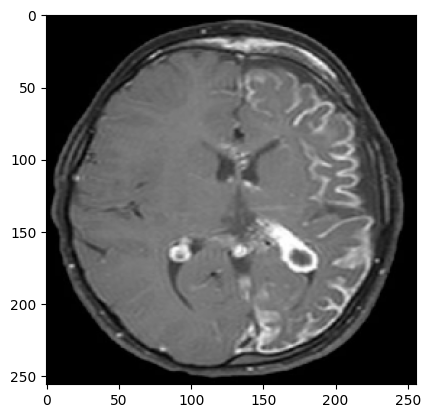

In [13]:
#Try to predict result from the dataset
img = cv2.imread("/content/data/brain_tumor_dataset/yes/Y186.jpg", 3)
img = cv2.resize(img, (256, 256))
plt.imshow(img)

In [14]:
classlist = ['This patient is safe','Tumour Detected!']
img = np.reshape(img, [1, 256, 256, 3])
prediction = classlist[np.argmax(model.predict(img))]
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Tumour Detected!
